In [3]:
# https://github.com/GeospatialPython/pyshp#reading-shapefiles-from-local-files

# import shapefile


# Import modules

In [4]:
# https://pygis.io/docs/e_interpolation.html?highlight=voronoi
# Import modules
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial import Voronoi, voronoi_plot_2d
from shapely.geometry import box
from shapely.geometry import Polygon, Point
from tqdm import tqdm

# Download GIS data

In [5]:
# https://stackoverflow.com/questions/5710867/downloading-and-unzipping-a-zip-file-without-writing-to-disk

# importing necessary modules
import requests
import zipfile
from io import BytesIO
import os

# https://pythonguides.com/download-zip-file-from-url-using-python/

def downloadzip(url, path_extraction):

    # Split URL to get the file name
    filename = url.split('/')[-1]

    # Downloading the file by sending the request to the URL
    req = requests.get(url)
    print('Downloading Completed')

    # extracting the zip file contents
    zipFile = zipfile.ZipFile(BytesIO(req.content))
    zipFile.extractall(path_extraction)


In [6]:
wdir = os.getcwd()

# check for extraction directories existence
if not os.path.isdir('SHP'):
    os.makedirs('SHP')

    
SHP_dir = wdir + '/SHP'

os.chdir(SHP_dir)

In [7]:
# https://spatialreference.org/ref/epsg/3763/
# proj = 'EPSG:3763'
proj = 3763

## Basins polygons 

In [8]:
# Load data

# Source of data
# https://sniamb.apambiente.pt/
# https://sniamb.apambiente.pt/content/geo-visualizador 


# Basins boundaries
# https://sniambgeoportal.apambiente.pt/geoportal/catalog/search/resource/details.page?uuid={978FF2AE-A9AC-44BA-AA8B-1EEDF1B4C90B}
# https://sniambgeoviewer.apambiente.pt/GeoDocs/shpzips/AtAgua_Bacias_bacias_snirh_PC.zip


#Defining the zip file URL
url = 'https://sniambgeoviewer.apambiente.pt/GeoDocs/shpzips/AtAgua_Bacias_bacias_snirh_PC.zip'

# path for extraction foldr
SHP_dir = wdir + '/SHP'

downloadzip(url, SHP_dir)


path_to_rb = SHP_dir + '/AtAgua_Bacias_bacias_snirh_PC.shp'
gdf_basins = gpd.read_file(path_to_rb, crs = proj )


gdf_basins.head()

,nome,areakm2,st_area_sh,st_length_,geometry
0,Ancora e Ribeiras Costeiras,128.8,1.287704e+08,7.703320e+04,"POLYGON ((-61001.371 242767.568, -60990.090 24..."
1,Arade,976.6,9.765606e+08,2.146028e+05,"POLYGON ((-9136.213 -246697.533, -9105.223 -24..."
2,Ave,1390.7,1.390621e+09,2.379512e+05,"POLYGON ((-2453.821 219994.451, -2440.619 2200..."
3,Cávado e Ribeiras Costeiras,1664.3,1.664181e+09,3.514721e+05,"POLYGON ((-48096.669 196089.532, -48081.123 19..."
4,Douro,18640.5,1.863931e+10,1.014734e+06,"POLYGON ((95993.875 256592.543, 96515.647 2564..."


In [9]:
gdf_basins.dtypes

nome            object
areakm2        float64
st_area_sh     float64
st_length_     float64
geometry      geometry
dtype: object

In [10]:

# Create a copy of basins dataset
basins_dissolved = gdf_basins.copy()

# Add a field with constant value of 1
basins_dissolved["constant"] = 1

# Dissolve all counties to create one polygon
basins_dissolved = basins_dissolved.dissolve(by = "constant").reset_index(drop = True)

## Weather stations points

In [11]:
# weather stations network
# https://sniambgeoportal.apambiente.pt/geoportal/catalog/search/resource/details.page?uuid={53334169-EDFA-4B4E-A096-B5FCA355564A}
# https://sniambgeoviewer.apambiente.pt/GeoDocs/shpzips/AtAgua_Meteo_METEO_NET_PC.zip

#Defining the zip file URL
url = 'https://sniambgeoviewer.apambiente.pt/GeoDocs/shpzips/AtAgua_Meteo_METEO_NET_PC.zip'


downloadzip(url, SHP_dir)

path_to_ws = SHP_dir + '/AtAgua_Meteo_METEO_NET_PC.shp'
gdf_meteo = gpd.read_file(path_to_ws, crs = proj)

# type casting
gdf_meteo['id'] = gdf_meteo['id'].astype('int')

gdf_meteo.head()

,id,codigo,nome,tipo,estado,telemetria,m,p,latitude,longitude,altitude,baciahid,ine_code,freguesia,concelho,distrito,cmilitar,notas,url,geometry
0,920685364,01F/01UG,FRIESTAS,UDOGRÁFICA,ACTIVA,NÃ,164630.296,563988.974,42.045,-8.560,32.0,MINHO,160806,FRIESTAS,VALENÇA,VIANA DO CASTELO,2,NaN,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-35370.618 263980.803)
1,920685912,01F/02UG,VALENÇA,UDOGRÁFICA,ACTIVA,NÃ,157640.549,560478.843,42.013,-8.645,15.0,MINHO,160801,ARÃO,VALENÇA,VIANA DO CASTELO,2,NaN,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-42359.994 260470.659)
2,920685760,01G/02UG,PARADA (MONÇÃO),UDOGRÁFICA,ACTIVA,NÃ,172738.965,561392.218,42.022,-8.462,246.0,MINHO,160419,PARADA,MONÇÃO,VIANA DO CASTELO,3,NaN,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-27262.261 261384.424)
3,920685474,01G/03UG,MERUFE,UDOGRÁFICA,ACTIVA,NÃ,178811.676,561001.260,42.018,-8.389,162.0,MINHO,160415,MERUFE,MONÇÃO,VIANA DO CASTELO,3,NaN,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-21189.802 260993.623)
4,920686036,01H/02G,PORTELINHA,UDOGRÁFICA,ACTIVA,SIM,196759.617,564673.055,42.052,-8.172,1018.0,LIMA,160302,CASTRO LABOREIRO,MELGAÇO,VIANA DO CASTELO,4,NaN,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-3242.799 264665.502)


In [12]:
gdf_meteo.columns

Index(['id', 'codigo', 'nome', 'tipo', 'estado', 'telemetria', 'm', 'p',
       'latitude', 'longitude', 'altitude', 'baciahid', 'ine_code',
       'freguesia', 'concelho', 'distrito', 'cmilitar', 'notas', 'url',
       'geometry'],
      dtype='object')

In [13]:
# Drop un-needed columns 

col2drop = ['tipo', 'estado', 'telemetria', 'm', 'p',
       'latitude', 'longitude', 'ine_code',
       'freguesia', 'concelho', 'distrito', 'cmilitar', 'notas']
       
gdf_meteo = gdf_meteo.drop(col2drop, axis = 1)



In [14]:
gdf_meteo.head()

,id,codigo,nome,altitude,baciahid,url,geometry
0,920685364,01F/01UG,FRIESTAS,32.0,MINHO,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-35370.618 263980.803)
1,920685912,01F/02UG,VALENÇA,15.0,MINHO,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-42359.994 260470.659)
2,920685760,01G/02UG,PARADA (MONÇÃO),246.0,MINHO,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-27262.261 261384.424)
3,920685474,01G/03UG,MERUFE,162.0,MINHO,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-21189.802 260993.623)
4,920686036,01H/02G,PORTELINHA,1018.0,LIMA,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-3242.799 264665.502)


In [15]:
# Get X and Y coordinates of rainfall points
x_rain = gdf_meteo["geometry"].x
y_rain = gdf_meteo["geometry"].y

# Create list of XY coordinate pairs
coords_rain = [list(xy) for xy in zip(x_rain, y_rain)]

## Hydrometric stations points

In [16]:
# weather stations network
# https://sniambgeoportal.apambiente.pt/geoportal/catalog/search/resource/details.page?uuid={53334169-EDFA-4B4E-A096-B5FCA355564A}
# https://sniambgeoviewer.apambiente.pt/GeoDocs/shpzips/AtAgua_Meteo_METEO_NET_PC.zip

#Defining the zip file URL
url = 'https://sniambgeoviewer.apambiente.pt/GeoDocs/shpzips/AtAgua_Agsup_HIDRO_NET_INACT_PC.zip'
downloadzip(url, SHP_dir)

url = 'https://sniambgeoviewer.apambiente.pt/GeoDocs/shpzips/AtAgua_Agsup_HIDRO_NET_ACT_PC.zip'
downloadzip(url, SHP_dir)


In [17]:
path_to_hydroa = SHP_dir + '/AtAgua_Agsup_HIDRO_NET_ACT_PC.shp'
gdf_hydroa = gpd.read_file(path_to_hydroa, crs = proj)

# type casting
gdf_hydroa['id'] = gdf_hydroa['id'].astype('int')

gdf_hydroa.head()

,id,codigo,nome,tipo,estado,m,p,latitude,longitude,altitude,...,baciahid,rio,ine_code,freguesia,concelho,distrito,cmilitar,notas,url,geometry
0,1627758770,01F/03H,MAZEDO,NaN,SUSPENSA,169300.000,564427.000,42.049,-8.504,36.0,...,MINHO,RIO DA GADANHA,160414,MAZEDO,MONÇÃO,VIANA DO CASTELO,3,Esta estação foi vandalizada. Levaram a parte ...,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-30701.140 264418.960)
1,1627758638,01G/02H,FOZ DO MOURO,LIMNIMÉTRICA,ACTIVA (EDP),178742.146,567472.365,42.076,-8.390,11.0,...,MINHO,RIO MINHO,160408,CEIVÃES,MONÇÃO,VIANA DO CASTELO,3,Estação da CPPE que continua activa nesta rede...,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-21259.489 267464.464)
2,1627758640,01G/03H,FOZ DO MOURO (INAG),NaN,SUSPENSA,178669.789,567546.330,42.077,-8.391,12.0,...,MINHO,RIO MINHO,160408,CEIVÃES,MONÇÃO,VIANA DO CASTELO,3,NaN,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-21331.845 267538.425)
3,1627759418,01G/04H,SEGUDE,NaN,ACTIVA,178751.458,564388.708,42.049,-8.390,36.0,...,MINHO,RIO MOURO,160427,SEGUDE,MONÇÃO,VIANA DO CASTELO,3,NaN,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-21250.101 264380.934)
4,1627743706,01H/03H,CASAIS,NaN,ACTIVA,194265.600,575253.000,42.147,-8.203,58.0,...,MINHO,RIO MINHO,160305,CRISTOVAL,MELGAÇO,VIANA DO CASTELO,1,A estação foi levada pela cheia (25/11/2006).,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-5736.827 275244.907)


In [18]:
gdf_hydroa.columns

Index(['id', 'codigo', 'nome', 'tipo', 'estado', 'm', 'p', 'latitude',
       'longitude', 'altitude', 'dist_foz', 'areadren', 'baciahid', 'rio',
       'ine_code', 'freguesia', 'concelho', 'distrito', 'cmilitar', 'notas',
       'url', 'geometry'],
      dtype='object')

In [19]:
path_to_hydroi = SHP_dir + '/AtAgua_Agsup_HIDRO_NET_INACT_PC.shp'
gdf_hydroi = gpd.read_file(path_to_hydroi, crs = proj)

# type casting
gdf_hydroi['id'] = gdf_hydroi['id'].astype('int')

gdf_hydroi.head()

,id,codigo,nome,tipo,estado,m,p,latitude,longitude,altitude,...,baciahid,rio,ine_code,freguesia,concelho,distrito,cmilitar,notas,url,geometry
0,1627758780,01G/01H,MESSEGÃES,ESCALA,EXTINTA,181599.900,568992.517,42.090,-8.356,23.0,...,MINHO,RIO MINHO,160432,VALADARES,MONÇÃO,VIANA DO CASTELO,3,Não se sabe as coordenadas correctas da nossa ...,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-18401.883 268984.579)
1,1627759122,02F/01H,PONTE MANTELÃES,LIMNIMÉTRICA,EXTINTA,163464.150,549873.425,41.917,-8.574,290.0,...,MINHO,RIO COURA,160509,FORMARIZ,PAREDES DE COURA,VIANA DO CASTELO,15,NaN,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-36536.346 249865.835)
2,1627759460,02H/01H,TIBO DA GAVIEIRA,LIMNIMÉTRICA COM DESCARREGADOR,EXTINTA,191622.514,552307.592,41.940,-8.234,478.0,...,LIMA,RIO DA PENEDA,160113,GAVIEIRA,ARCOS DE VALDEVEZ,VIANA DO CASTELO,9,Instalada em 1942 com escala. \r\nEm 1944 com ...,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-8379.368 252300.514)
3,1627743524,02H/02H,BARRAGEM DO LINDOSO,LIMNIMÉTRICA,EXTINTA,194102.781,544672.720,41.871,-8.204,299.0,...,LIMA,RIO LIMA,160146,SOAJO,ARCOS DE VALDEVEZ,VIANA DO CASTELO,17,NaN,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-5899.073 244666.071)
4,1627743470,03D/01H,ASPRA,Limnigráfica,EXTINTA,140576.594,537711.240,41.807,-8.848,7.0,...,ÂNCORA,RIO ÂNCORA,160217,VILA PRAIA DE ÂNCORA,CAMINHA,VIANA DO CASTELO,27,"Como não sabemos a data da desactivação, assum...",http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-59422.656 237703.570)


In [39]:
gdf_hydro = pd.concat([gdf_hydroi,gdf_hydroa])

In [22]:
# # Drop un-needed columns 

# col2drop = ['tipo', 'estado', 'telemetria', 'm', 'p',
#        'latitude', 'longitude', 'ine_code',
#        'freguesia', 'concelho', 'distrito', 'cmilitar', 'notas']
       
# gdf_hydroa = gdf_hydroa.drop(col2drop, axis = 1)
# gdf_hydroi = gdf_hydroi.drop(col2drop, axis = 1)


In [23]:
gdf_hydroa.head()

,id,codigo,nome,tipo,estado,m,p,latitude,longitude,altitude,...,baciahid,rio,ine_code,freguesia,concelho,distrito,cmilitar,notas,url,geometry
0,1627758770,01F/03H,MAZEDO,NaN,SUSPENSA,169300.000,564427.000,42.049,-8.504,36.0,...,MINHO,RIO DA GADANHA,160414,MAZEDO,MONÇÃO,VIANA DO CASTELO,3,Esta estação foi vandalizada. Levaram a parte ...,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-30701.140 264418.960)
1,1627758638,01G/02H,FOZ DO MOURO,LIMNIMÉTRICA,ACTIVA (EDP),178742.146,567472.365,42.076,-8.390,11.0,...,MINHO,RIO MINHO,160408,CEIVÃES,MONÇÃO,VIANA DO CASTELO,3,Estação da CPPE que continua activa nesta rede...,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-21259.489 267464.464)
2,1627758640,01G/03H,FOZ DO MOURO (INAG),NaN,SUSPENSA,178669.789,567546.330,42.077,-8.391,12.0,...,MINHO,RIO MINHO,160408,CEIVÃES,MONÇÃO,VIANA DO CASTELO,3,NaN,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-21331.845 267538.425)
3,1627759418,01G/04H,SEGUDE,NaN,ACTIVA,178751.458,564388.708,42.049,-8.390,36.0,...,MINHO,RIO MOURO,160427,SEGUDE,MONÇÃO,VIANA DO CASTELO,3,NaN,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-21250.101 264380.934)
4,1627743706,01H/03H,CASAIS,NaN,ACTIVA,194265.600,575253.000,42.147,-8.203,58.0,...,MINHO,RIO MINHO,160305,CRISTOVAL,MELGAÇO,VIANA DO CASTELO,1,A estação foi levada pela cheia (25/11/2006).,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-5736.827 275244.907)


## Plot raw shapefiles

Text(249.62800569369165, 0.5, 'Y [m]')

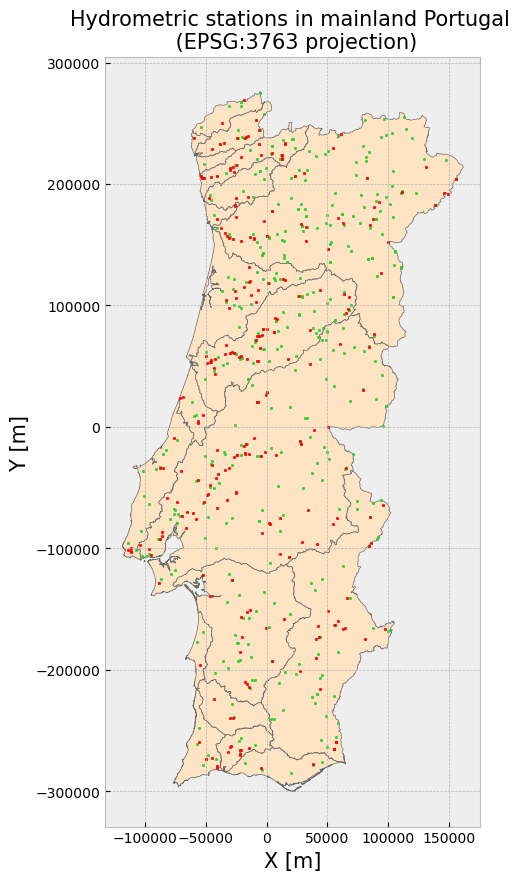

In [25]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Stylize plots
plt.style.use('bmh')

# Plot data
gdf_basins.plot(ax = ax, color = 'bisque', edgecolor = 'dimgray')
gdf_hydroa.plot(ax = ax, marker = 'o', color = 'limegreen', markersize = 3)
gdf_hydroi.plot(ax = ax, marker = 'o', color = 'red', markersize = 3)
# Set title
ax.set_title(f'Hydrometric stations in mainland Portugal \n (EPSG:{proj} projection)', fontdict = {'fontsize': '15', 'fontweight' : '3'})
ax.set_xlabel(f'X [m]', fontdict = {'fontsize': '15', 'fontweight' : '3'})
ax.set_ylabel(f'Y [m]', fontdict = {'fontsize': '15', 'fontweight' : '3'})

# Download data from SNIRH (www.snirh.pt)

## Daily rainfall

In [29]:
def download_par(gdf, par, date_init, date_end, wdir, dir_name):

    # returns to home diretory
    os.chdir(wdir)

    # check for extraction directories existence
    if not os.path.isdir(dir_name):
        os.makedirs(dir_name)

    os.chdir(wdir + '/' + dir_name)

    # list of id for relevant weather stations
    l_ids = gdf.id.astype(int)

    # for iter, row in gdf_Mondego_stations.iterrows():
    for i in tqdm(l_ids):

        id =  str(i)
        
        url=f'https://snirh.apambiente.pt/snirh/_dadosbase/site/paraCSV/dados_csv.php?sites={id}&pars={par}&tmin={date_init}&tmax={date_end}&formato=csv'

        # https://www.tutorialspoint.com/downloading-files-from-web-using-python
        # Downloading the file by sending the request to the URL
        r = requests.get(url)

        fname = id + '.csv'
        open(fname, 'wb').write(r.content)


    print('Downloading Completed')

    # returns to home diretory
    os.chdir(wdir)


In [30]:
par = '413026594'
dir_name = 'DAILY_RAINFALL'
date_init = '01/10/1950'
date_end = '30/09/2023'

download_par(gdf_meteo, par, date_init, date_end, wdir, dir_name)

100%|██████████| 791/791 [21:00<00:00,  1.59s/it]

## Montly rainfall

In [32]:
par = '1436794570'
dir_name = 'MONTHLY_RAINFALL'
date_init = '01/10/1950'
date_end = '30/09/2023'

download_par(gdf_meteo, par, date_init, date_end, wdir, dir_name)

  0%|          | 0/791 [00:00<?, ?it/s]

100%|██████████| 791/791 [18:34<00:00,  1.41s/it]

## Daily flowrate

In [40]:
par = '1850'
dir_name = 'DAILY_FLOW'
date_init = '01/10/1950'
date_end = '30/09/2023'

download_par(gdf_hydro, par, date_init, date_end, wdir, dir_name)

100%|██████████| 684/684 [11:07<00:00,  1.02it/s]

## Monthly flowrate

In [41]:
par = '1849'
dir_name = 'MONTHLY_FLOW'
date_init = '01/10/1950'
date_end = '30/09/2023'

download_par(gdf_hydro, par, date_init, date_end, wdir, dir_name)

100%|██████████| 684/684 [13:33<00:00,  1.19s/it]